# Saham Alphabet Inc.

In [4]:
import yfinance as yf

data = yf.download("GOOGL", start="2024-01-01", end="2025-01-01")
data.to_csv("GOOGL_data.csv")
print("Data GOOGL berhasil diunduh dan disimpan ke GOOGL_data.csv")


[*********************100%***********************]  1 of 1 completed

Data GOOGL berhasil diunduh dan disimpan ke GOOGL_data.csv


In [7]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from scipy.stats import norm, kstest
import scipy.stats as stats


In [8]:
data1=pd.read_csv('GOOGL_data.csv')
data1

,Date,Close,High,Low,Open,Volume
0,2024-01-02,137.670929,138.946304,135.987031,138.049561,23711200
1,2024-01-03,138.418228,139.125670,136.584878,136.754262,24212100
2,2024-01-04,135.897354,138.657353,135.857505,137.920020,27137700
3,2024-01-05,135.239746,136.664589,134.661839,136.256066,22506000
4,2024-01-08,138.338516,138.507900,135.767833,135.797724,21404000
...,...,...,...,...,...,...
247,2024-12-24,196.110001,196.110001,193.779999,194.839996,10403300
248,2024-12-26,195.600006,196.750000,194.380005,195.149994,12046600
249,2024-12-27,192.759995,195.320007,190.649994,194.949997,18891400
250,2024-12-30,191.240005,192.550003,189.119995,189.800003,14264700


In [9]:
duplicates = data1.duplicated().sum()
print(f'jumlah nilai duplikat :{duplicates}')

jumlah nilai duplikat :0


In [10]:
null_counts = data1.isnull().sum()
print(null_counts)

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


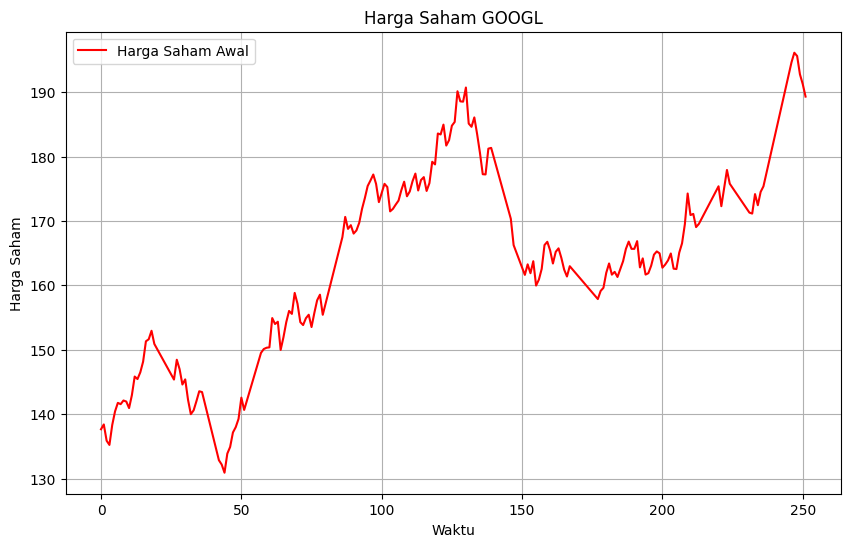

In [39]:
# Plot harga saham awal
plt.figure(figsize=(10, 6))
plt.plot( data1['Close'], color='red', label='Harga Saham Awal')
plt.title('Harga Saham GOOGL')
plt.xlabel('Waktu')
plt.ylabel('Harga Saham')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
import numpy as np
import pandas as pd
from scipy import stats

# Menghitung log return harian saham
data1['Close'] = pd.to_numeric(data1['Close'], errors='coerce')
data1['Return'] = np.log(data1['Close'] / data1['Close'].shift(1))

# Mengisi nilai NaN
data1['Return'] = data1['Return'].fillna(0)

# Menghapus outlier lebih dari 3 standar deviasi
data1 = data1[np.abs(data1['Return'] - data1['Return'].mean()) <= 2 * data1['Return'].std()]

# Menghitung ekspektasi return (mu), variansi, dan volatilitas (sigma)
mu = data1['Return'].mean()
sigma = data1['Return'].std()
variance_return = np.var(data1['Return'])

# Uji Kolmogorov-Smirnov dengan distribusi normal
ks_stat, ks_p_value = stats.kstest(data1['Return'], 'norm', args=(mu, sigma))

# Menampilkan hasil uji KS
print(f"Mean return: {mu}")
print(f"Standard deviation of return: {sigma}")
print(f"Variansi Return: {variance_return}")
print(f"Kolmogorov-Smirnov Statistic: {ks_stat}")
print(f"P-value: {ks_p_value}")

# Menginterpretasikan hasil uji
alpha = 0.05  # Tingkat signifikansi
if ks_p_value > alpha:
    print("Hasil uji: Data return mengikuti distribusi normal (terima H0)")
else:
    print("Hasil uji: Data return tidak mengikuti distribusi normal (terima H1)")


Mean return: 0.0013926402487238446
Standard deviation of return: 0.012477752076852837
Variansi Return: 0.0001548791435045393
Kolmogorov-Smirnov Statistic: 0.09343993499358905
P-value: 0.06672584002221082
Hasil uji: Data return mengikuti distribusi normal (terima H0)


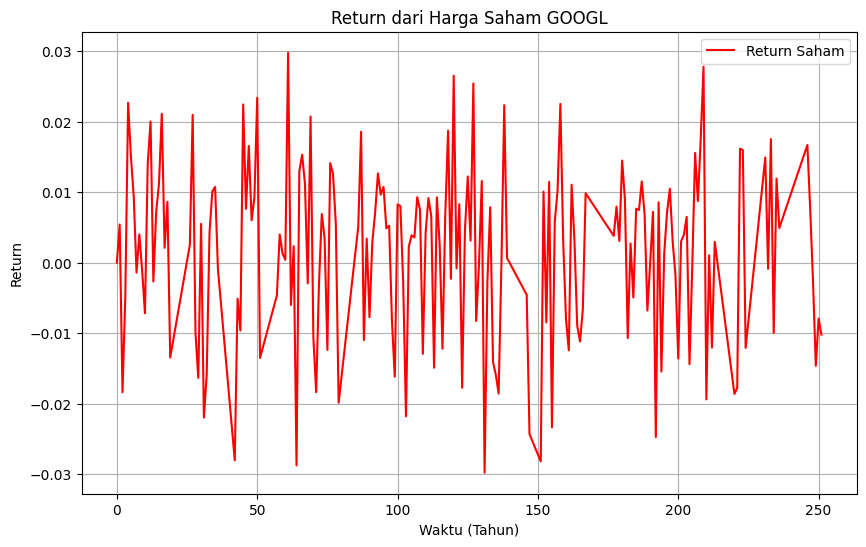

In [21]:
# Plot Return
plt.figure(figsize=(10, 6))
plt.plot(data1['Return'], color='red', label='Return Saham')
plt.title('Return dari Harga Saham GOOGL')
plt.xlabel('Waktu (Tahun)')
plt.ylabel('Return')
plt.grid(True)
plt.legend()
plt.show()

MAPE (%) rata-rata: 0.0058
Harga Terendah: 130.9253692626953, Harga Tertinggi: 196.1100006103516
Harga Simulasi Minimal: 130.91217140795482, Harga Simulasi Maksimal: 196.11590555210446
     Harga Saham (Awal)    Return  Volatilitas  Harga Saham Prediksi   APE (%)
0            137.670929  0.000000     0.012478            137.677127  0.004502
1            138.418228  0.005413     0.012478            138.416503  0.001246
2            135.897354 -0.018380     0.012478            135.905436  0.005947
3            135.239746 -0.004851     0.012478            135.258750  0.014052
4            138.338516  0.022655     0.012478            138.335595  0.002112
..                  ...       ...          ...                   ...       ...
247          196.110001  0.007575     0.012478            196.115906  0.003011
248          195.600006 -0.002604     0.012478            195.599097  0.000465
249          192.759995 -0.014626     0.012478            192.749428  0.005481
250          191.240005 -

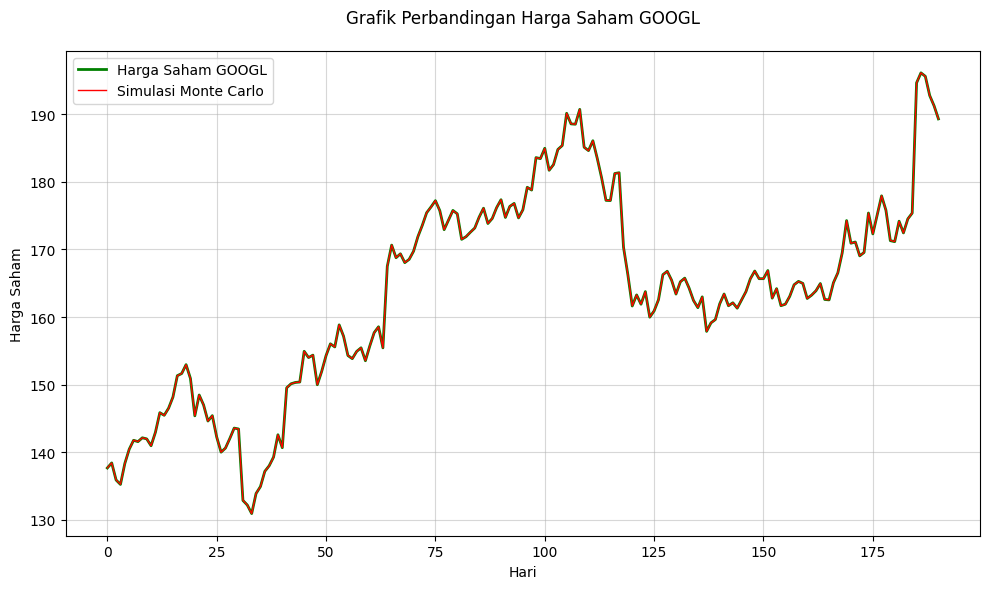

In [22]:

# Fungsi untuk menghasilkan harga simulasi
def generate_sim_prices(prices):
    np.random.seed(42)
    sim = prices + np.random.normal(0, sigma, len(prices))
    return sim

# Simulasi harga saham
prices = data1['Close'].values
sim_prices = generate_sim_prices(prices)

# Menghitung APE setiap hari
ape_daily = np.abs((sim_prices - prices) / prices) * 100

# Menyusun DataFrame untuk hasil simulasi
data11 = {
    "Harga Saham (Awal)": data1['Close'],  # Harga saham awal
    "Return": data1['Return'],  # Return harian saham
    "Volatilitas": [sigma] * len(data1),  # Volatilitas (sigma) yang sama untuk semua baris
    "Harga Saham Prediksi": sim_prices,  # Harga saham yang diprediksi
    "APE (%)": ape_daily  # APE setiap hari
}

# Menampilkan DataFrame
df1 = pd.DataFrame(data11)

# Menampilkan rata-rata APE
mean_ape = np.mean(ape_daily)
print(f'MAPE (%) rata-rata: {mean_ape:.4f}')


# Memeriksa grafik error atau tidak
print(f"Harga Terendah: {min(prices)}, Harga Tertinggi: {max(prices)}")
print(f"Harga Simulasi Minimal: {min(sim_prices)}, Harga Simulasi Maksimal: {max(sim_prices)}")

# Menampilkan tabel hasil simulasi
print(df1)

# Membuat Grafik
plt.figure(figsize=(10, 6))

# Membuat garis harga saham lebih tebal
plt.plot(prices, color='g', label='Harga Saham GOOGL', linewidth=2)  # Lebar garis diperbesar menjadi 2
plt.plot(sim_prices, color='red', label='Simulasi Monte Carlo', linewidth=1)
plt.ylabel('Harga Saham')
plt.xlabel('Hari')
plt.title('Grafik Perbandingan Harga Saham GOOGL', pad=20)
plt.grid(True, alpha=0.5)
plt.legend()
plt.ylim(auto=True)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
plt.tight_layout()
plt.show()


# Saham Microsoft Corp.

In [23]:
import yfinance as yf

data = yf.download("MSFT", start="2024-01-01", end="2025-01-01")
data.to_csv("MSFT_data.csv")
print("Data MSFT berhasil diunduh dan disimpan ke MSFT_data.csv")


[*********************100%***********************]  1 of 1 completed

Data MSFT berhasil diunduh dan disimpan ke MSFT_data.csv


In [40]:
data2=pd.read_csv('MSFT_data.csv')
data2

,Price,Close,High,Low,Open,Volume
0,2024-01-02,368.117249,373.109913,364.047674,371.085046,25258600
1,2024-01-03,367.849274,370.489534,365.774790,366.271079,23083500
2,2024-01-04,365.208984,370.330688,364.444711,367.918732,20901500
3,2024-01-05,365.020416,369.298423,363.779694,366.231362,20987000
4,2024-01-08,371.908905,372.415129,366.271072,366.558897,23134000
...,...,...,...,...,...,...
247,2024-12-24,439.329987,439.600006,434.190002,434.649994,7164500
248,2024-12-26,438.109985,440.940002,436.630005,439.079987,8194200
249,2024-12-27,430.529999,435.220001,426.350006,434.600006,18117700
250,2024-12-30,424.829987,427.549988,421.899994,426.059998,13158700


In [25]:
duplicates = data2.duplicated().sum()
print(f'jumlah nilai duplikat :{duplicates}')

jumlah nilai duplikat :0


In [26]:
null_counts = data2.isnull().sum()
print(null_counts)

Price     0
Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64


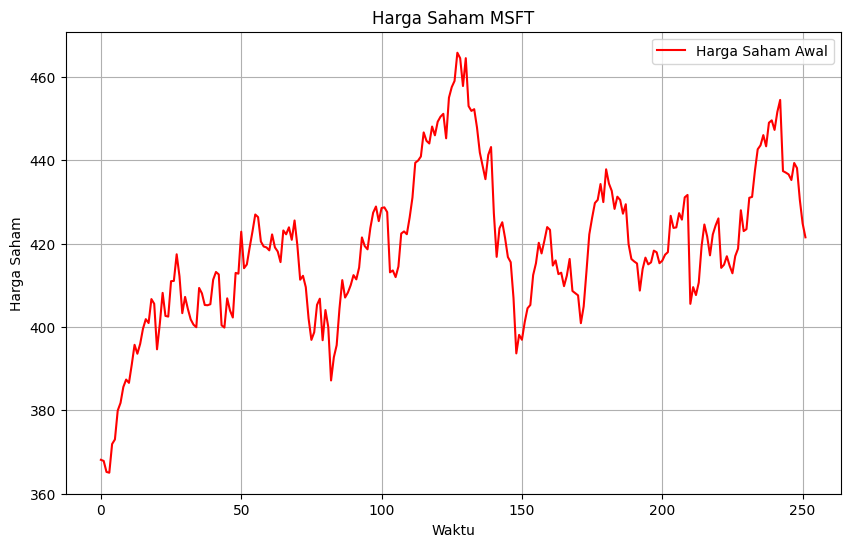

In [41]:
# Plot harga saham awal
plt.figure(figsize=(10, 6))
plt.plot( data2['Close'], color='red', label='Harga Saham Awal')
plt.title('Harga Saham MSFT')
plt.xlabel('Waktu')
plt.ylabel('Harga Saham')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
import numpy as np
import pandas as pd
from scipy import stats

# Menghitung log return harian saham
data2['Close'] = pd.to_numeric(data2['Close'], errors='coerce')
data2['Return'] = np.log(data2['Close'] / data2['Close'].shift(1))

# Mengisi nilai NaN
data2['Return'] = data2['Return'].fillna(0)

# Menghapus outlier lebih dari 3 standar deviasi
data2 = data2[np.abs(data2['Return'] - data2['Return'].mean()) <= 2 * data2['Return'].std()]

# Menghitung ekspektasi return (mu), variansi, dan volatilitas (sigma)
mu = data2['Return'].mean()
sigma = data2['Return'].std()
variance_return = np.var(data2['Return'])

# Uji Kolmogorov-Smirnov dengan distribusi normal
ks_stat, ks_p_value = stats.kstest(data2['Return'], 'norm', args=(mu, sigma))

# Menampilkan hasil uji KS
print(f"Mean return: {mu}")
print(f"Standard deviation of return: {sigma}")
print(f"Variansi Return: {variance_return}")
print(f"Kolmogorov-Smirnov Statistic: {ks_stat}")
print(f"P-value: {ks_p_value}")

# Menginterpretasikan hasil uji
alpha = 0.05  # Tingkat signifikansi
if ks_p_value > alpha:
    print("Hasil uji: Data return mengikuti distribusi normal (terima H0)")
else:
    print("Hasil uji: Data return tidak mengikuti distribusi normal (terima H1)")


Mean return: 0.0021208030199628513
Standard deviation of return: 0.010013316838437177
Variansi Return: 9.984698894330217e-05
Kolmogorov-Smirnov Statistic: 0.03419031234869374
P-value: 0.9335708788936508
Hasil uji: Data return mengikuti distribusi normal (terima H0)


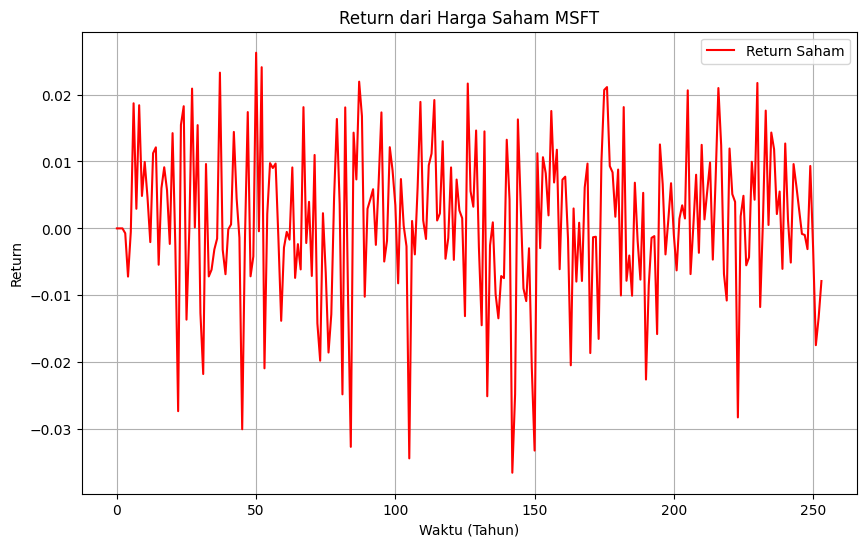

In [29]:
# Plot Return
plt.figure(figsize=(10, 6))
plt.plot(data2['Return'], color='red', label='Return Saham')
plt.title('Return dari Harga Saham MSFT')
plt.xlabel('Waktu (Tahun)')
plt.ylabel('Return')
plt.grid(True)
plt.legend()
plt.show()

MAPE (%) rata-rata: 0.0018
Harga Terendah: 365.0204162597656, Harga Tertinggi: 465.7864379882813
Harga Simulasi Minimal: 365.03566684027226, Harga Simulasi Maksimal: 465.77733200356755
     Harga Saham (Awal)    Return  Volatilitas  Harga Saham Prediksi   APE (%)
0            368.117249  0.000000     0.010013            368.122222  0.001351
1            367.849274 -0.000728     0.010013            367.847889  0.000376
2            365.208984 -0.007204     0.010013            365.215470  0.001776
3            365.020416 -0.000516     0.010013            365.035667  0.004178
4            371.908905  0.018696     0.010013            371.906560  0.000630
..                  ...       ...          ...                   ...       ...
247          439.329987  0.009330     0.010013            439.351455  0.004887
248          438.109985 -0.002781     0.010013            438.116333  0.001449
249          430.529999 -0.017453     0.010013            430.509720  0.004710
250          424.829987 -

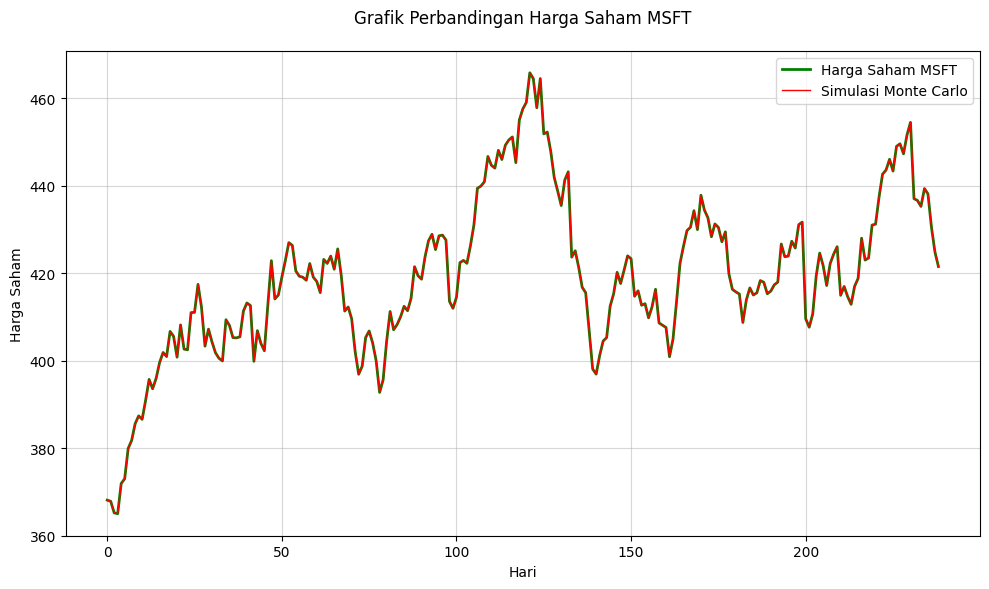

In [43]:

# Fungsi untuk menghasilkan harga simulasi
def generate_sim_prices(prices):
    np.random.seed(42)
    sim = prices + np.random.normal(0, sigma, len(prices))
    return sim

# Simulasi harga saham
prices = data2['Close'].values
sim_prices = generate_sim_prices(prices)

# Menghitung APE setiap hari
ape_daily = np.abs((sim_prices - prices) / prices) * 100

# Menyusun DataFrame untuk hasil simulasi
data22 = {
    "Harga Saham (Awal)": data2['Close'],  # Harga saham awal
    "Return": data2['Return'],  # Return harian saham
    "Volatilitas": [sigma] * len(data2),  # Volatilitas (sigma) yang sama untuk semua baris
    "Harga Saham Prediksi": sim_prices,  # Harga saham yang diprediksi
    "APE (%)": ape_daily  # APE setiap hari
}

# Menampilkan DataFrame
df2 = pd.DataFrame(data22)

# Menampilkan rata-rata APE
mean_ape = np.mean(ape_daily)
print(f'MAPE (%) rata-rata: {mean_ape:.4f}')


# Memeriksa grafik error atau tidak
print(f"Harga Terendah: {min(prices)}, Harga Tertinggi: {max(prices)}")
print(f"Harga Simulasi Minimal: {min(sim_prices)}, Harga Simulasi Maksimal: {max(sim_prices)}")

# Menampilkan tabel hasil simulasi
print(df2)

# Membuat Grafik
plt.figure(figsize=(10, 6))

# Membuat garis harga saham lebih tebal
plt.plot(prices, color='g', label='Harga Saham MSFT', linewidth=2)  # Lebar garis diperbesar menjadi 2
plt.plot(sim_prices, color='red', label='Simulasi Monte Carlo', linewidth=1)
plt.ylabel('Harga Saham')
plt.xlabel('Hari')
plt.title('Grafik Perbandingan Harga Saham MSFT', pad=20)
plt.grid(True, alpha=0.5)
plt.legend()
plt.ylim(auto=True)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
plt.tight_layout()
plt.show()


# Saham Apple Inc.

In [31]:
import yfinance as yf

data = yf.download("AAPL", start="2024-01-01", end="2025-01-01")
data.to_csv("AAPL_data.csv")
print("Data AAPL berhasil diunduh dan disimpan ke AAPL_data.csv")


[*********************100%***********************]  1 of 1 completed

Data AAPL berhasil diunduh dan disimpan ke AAPL_data.csv


In [49]:
data3=pd.read_csv('AAPL_data.csv')
data3

,Price,Close,High,Low,Open,Volume
0,2024-01-02,184.734985,187.521338,182.993517,186.237618,82488700
1,2024-01-03,183.351761,184.973819,182.535751,183.321908,58414500
2,2024-01-04,181.023178,182.197418,179.998201,181.261998,71983600
3,2024-01-05,180.296707,181.869006,179.291637,181.102771,62303300
4,2024-01-08,184.655365,184.695178,180.615161,181.202281,59144500
...,...,...,...,...,...,...
247,2024-12-24,258.200012,258.209991,255.289993,255.490005,23234700
248,2024-12-26,259.019989,260.100006,257.630005,258.190002,27237100
249,2024-12-27,255.589996,258.700012,253.059998,257.829987,42355300
250,2024-12-30,252.199997,253.500000,250.750000,252.229996,35557500


In [50]:
duplicates = data3.duplicated().sum()
print(f'jumlah nilai duplikat :{duplicates}')

jumlah nilai duplikat :0


In [51]:
null_counts = data2.isnull().sum()
print(null_counts)

Price     0
Close     0
High      0
Low       0
Open      0
Volume    0
Return    0
dtype: int64


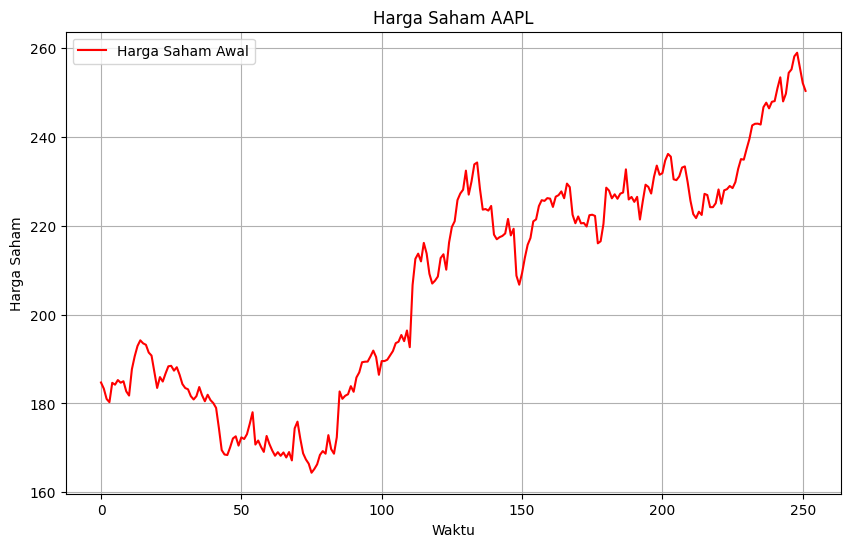

In [52]:
# Plot harga saham awal
plt.figure(figsize=(10, 6))
plt.plot( data3['Close'], color='red', label='Harga Saham Awal')
plt.title('Harga Saham AAPL')
plt.xlabel('Waktu')
plt.ylabel('Harga Saham')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
import numpy as np
import pandas as pd
from scipy import stats

# Menghitung log return harian saham
data3['Close'] = pd.to_numeric(data3['Close'], errors='coerce')
data3['Return'] = np.log(data3['Close'] / data3['Close'].shift(1))

# Mengisi nilai NaN
data3['Return'] = data3['Return'].fillna(0)

# Menghapus outlier lebih dari 3 standar deviasi
data3 = data3[np.abs(data3['Return'] - data3['Return'].mean()) <= 2 * data3['Return'].std()]

# Menghitung ekspektasi return (mu), variansi, dan volatilitas (sigma)
mu = data3['Return'].mean()
sigma = data3['Return'].std()
variance_return = np.var(data3['Return'])

# Uji Kolmogorov-Smirnov dengan distribusi normal
ks_stat, ks_p_value = stats.kstest(data3['Return'], 'norm', args=(mu, sigma))

# Menampilkan hasil uji KS
print(f"Mean return: {mu}")
print(f"Standard deviation of return: {sigma}")
print(f"Variansi Return: {variance_return}")
print(f"Kolmogorov-Smirnov Statistic: {ks_stat}")
print(f"P-value: {ks_p_value}")

# Menginterpretasikan hasil uji
alpha = 0.05  # Tingkat signifikansi
if ks_p_value > alpha:
    print("Hasil uji: Data return mengikuti distribusi normal (terima H0)")
else:
    print("Hasil uji: Data return tidak mengikuti distribusi normal (terima H1)")


Mean return: 0.0012484082578907661
Standard deviation of return: 0.010959184968229485
Variansi Return: 0.000119603302938001
Kolmogorov-Smirnov Statistic: 0.03381951795173305
P-value: 0.9378038670503854
Hasil uji: Data return mengikuti distribusi normal (terima H0)


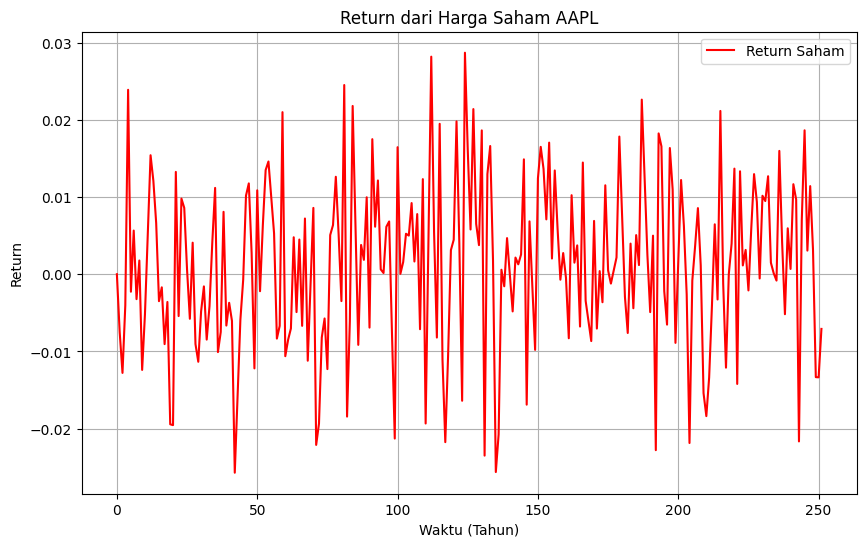

In [56]:
# Plot Return
plt.figure(figsize=(10, 6))
plt.plot(data3['Return'], color='red', label='Return Saham')
plt.title('Return dari Harga Saham AAPL')
plt.xlabel('Waktu (Tahun)')
plt.ylabel('Return')
plt.grid(True)
plt.legend()
plt.show()

MAPE (%) rata-rata: 0.0041
Harga Terendah: 164.40512084960938, Harga Tertinggi: 259.0199890136719
Harga Simulasi Minimal: 164.42197647682917, Harga Simulasi Maksimal: 258.99779510147766
     Harga Saham (Awal)    Return  Volatilitas  Harga Saham Prediksi   APE (%)
0            184.734985  0.000000     0.010959            184.740429  0.002947
1            183.351761 -0.007516     0.010959            183.350246  0.000826
2            181.023178 -0.012781     0.010959            181.030276  0.003921
3            180.296707 -0.004021     0.010959            180.313398  0.009258
4            184.655365  0.023887     0.010959            184.652799  0.001390
..                  ...       ...          ...                   ...       ...
247          258.200012  0.011413     0.010959            258.206959  0.002691
248          259.019989  0.003171     0.010959            258.997795  0.008568
249          255.589996 -0.013331     0.010959            255.592040  0.000799
250          252.199997 

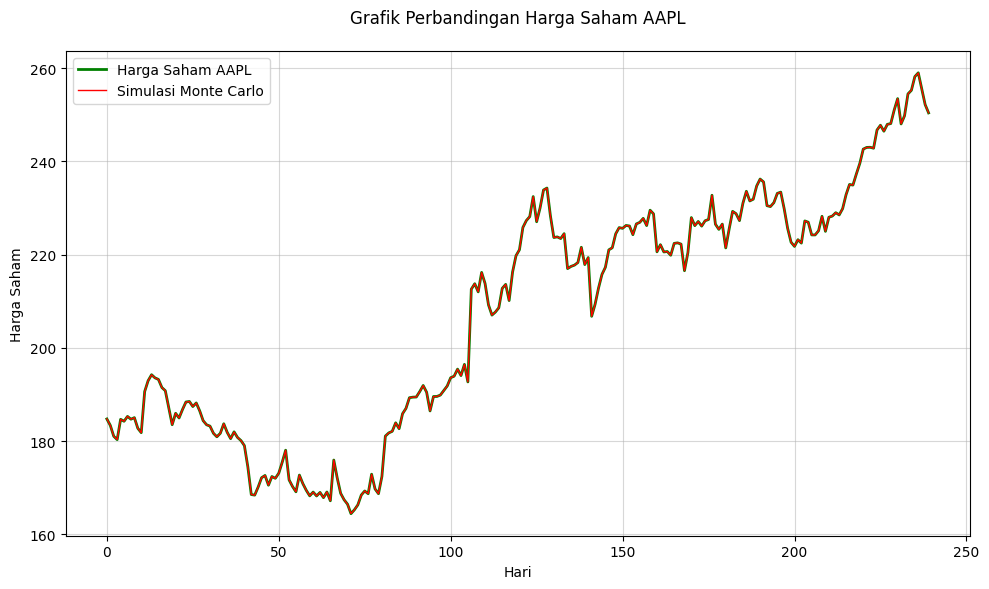

In [55]:

# Fungsi untuk menghasilkan harga simulasi
def generate_sim_prices(prices):
    np.random.seed(42)
    sim = prices + np.random.normal(0, sigma, len(prices))
    return sim

# Simulasi harga saham
prices = data3['Close'].values
sim_prices = generate_sim_prices(prices)

# Menghitung APE setiap hari
ape_daily = np.abs((sim_prices - prices) / prices) * 100

# Menyusun DataFrame untuk hasil simulasi
data33 = {
    "Harga Saham (Awal)": data3['Close'],  # Harga saham awal
    "Return": data3['Return'],  # Return harian saham
    "Volatilitas": [sigma] * len(data3),  # Volatilitas (sigma) yang sama untuk semua baris
    "Harga Saham Prediksi": sim_prices,  # Harga saham yang diprediksi
    "APE (%)": ape_daily  # APE setiap hari
}

# Menampilkan DataFrame
df3 = pd.DataFrame(data33)

# Menampilkan rata-rata APE
mean_ape = np.mean(ape_daily)
print(f'MAPE (%) rata-rata: {mean_ape:.4f}')


# Memeriksa grafik error atau tidak
print(f"Harga Terendah: {min(prices)}, Harga Tertinggi: {max(prices)}")
print(f"Harga Simulasi Minimal: {min(sim_prices)}, Harga Simulasi Maksimal: {max(sim_prices)}")

# Menampilkan tabel hasil simulasi
print(df3)

# Membuat Grafik
plt.figure(figsize=(10, 6))

# Membuat garis harga saham lebih tebal
plt.plot(prices, color='g', label='Harga Saham AAPL', linewidth=2)  # Lebar garis diperbesar menjadi 2
plt.plot(sim_prices, color='red', label='Simulasi Monte Carlo', linewidth=1)
plt.ylabel('Harga Saham')
plt.xlabel('Hari')
plt.title('Grafik Perbandingan Harga Saham AAPL', pad=20)
plt.grid(True, alpha=0.5)
plt.legend()
plt.ylim(auto=True)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
plt.tight_layout()
plt.show()
